# # Project: Multiple Linear Regression Function to Predict Star Rating  

With a dataset of different restaurant features and their Yelp ratings, in this project we use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for new restaurants

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Part 1: Load the Data and Take a Look

In [5]:
# load the data into datadrames
businesses = pd.read_json('/Users/Amir/PythonProjects/YelpDataset/yelp_business.json', lines=True)
reviews = pd.read_json('/Users/Amir/PythonProjects/YelpDataset/yelp_review.json', lines=True)
users = pd.read_json('/Users/Amir/PythonProjects/YelpDataset/yelp_user.json', lines=True)
checkins = pd.read_json('/Users/Amir/PythonProjects/YelpDataset/yelp_checkin.json', lines=True)
tips = pd.read_json('/Users/Amir/PythonProjects/YelpDataset/yelp_tip.json', lines=True)
photos = pd.read_json('/Users/Amir/PythonProjects/YelpDataset/yelp_photo.json', lines=True)
# Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [6]:
businesses.head(3)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0


In [7]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
address               188593 non-null object
alcohol?              188593 non-null int64
attributes            162807 non-null object
business_id           188593 non-null object
categories            188052 non-null object
city                  188593 non-null object
good_for_kids         188593 non-null int64
has_bike_parking      188593 non-null int64
has_wifi              188593 non-null int64
hours                 143791 non-null object
is_open               188593 non-null int64
latitude              188587 non-null float64
longitude             188587 non-null float64
name                  188593 non-null object
neighborhood          188593 non-null object
postal_code           188593 non-null object
price_range           188593 non-null int64
review_count          188593 non-null int64
stars                 188593 non-null float64
state                 188593 non-null 

In [8]:
# Example: what is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

## Part 2: Merge the Data

In [9]:
# Joining the dataframe on the common column 
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 40 columns):
address                       188593 non-null object
alcohol?                      188593 non-null int64
attributes                    162807 non-null object
business_id                   188593 non-null object
categories                    188052 non-null object
city                          188593 non-null object
good_for_kids                 188593 non-null int64
has_bike_parking              188593 non-null int64
has_wifi                      188593 non-null int64
hours                         143791 non-null object
is_open                       188593 non-null int64
latitude                      188587 non-null float64
longitude                     188587 non-null float64
name                          188593 non-null object
neighborhood                  188593 non-null object
postal_code                   188593 non-null object
price_range                   188593 non-nul

## Part 3: Clean the Data

In [10]:
# Drop unwante columns and return results in the same dataframe
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
# axis=1 lets Pandas know we want to drop columns, not rows
# inplace=True lets us drop the columns right here in our DataFrame, instead of returning a new DataFrame
df.drop(labels=features_to_remove, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 26 columns):
alcohol?                      188593 non-null int64
good_for_kids                 188593 non-null int64
has_bike_parking              188593 non-null int64
has_wifi                      188593 non-null int64
price_range                   188593 non-null int64
review_count                  188593 non-null int64
stars                         188593 non-null float64
take_reservations             188593 non-null int64
takes_credit_cards            188593 non-null int64
average_review_age            188593 non-null float64
average_review_length         188593 non-null float64
average_review_sentiment      188593 non-null float64
number_cool_votes             188593 non-null int64
number_funny_votes            188593 non-null int64
number_useful_votes           188593 non-null int64
average_days_on_yelp          188593 non-null float64
average_number_fans           188593 non-null f

In [11]:
# check for missing values (if any, they will prevent LR from running)
df.isna().any()
# replace all of our NaNs with 0s
df.fillna({'weekday_checkins':0,'weekend_checkins':0, 'average_tip_length':0, 'number_tips':0, 'average_caption_length':0,'number_pics':0}, inplace=True)
# check for missing values
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Part 4: Exploratory Analysis

In [12]:
# find the pairwise correlation of all columns in the dataframe
correlation= df.corr(method ='pearson')
# select features collorations toward the ratings (and make them positive)
correlation_1 = correlation[['stars']].abs()
# print(correlation_1)
correlation_2 = correlation_1.sort_values(by=['stars'], ascending=False)
# features corrolating well with the rating 
correlation_2.nlargest(4, 'stars')

,stars
stars,1.000000
average_review_sentiment,0.782187
average_review_length,0.277081
average_review_age,0.125645


Text(0, 0.5, 'rating')

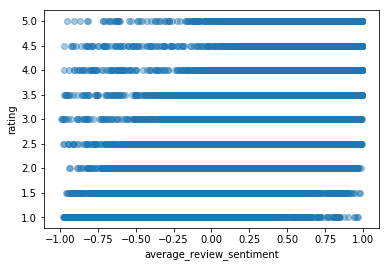

In [13]:
# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.4)
plt.xlabel("average_review_sentiment")
plt.ylabel("rating")

Text(0, 0.5, 'rating')

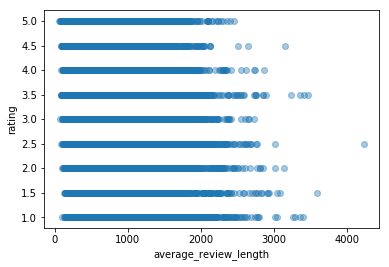

In [51]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'], df['stars'], alpha=0.4)
plt.xlabel("average_review_length")
plt.ylabel("rating")

Text(0, 0.5, 'rating')

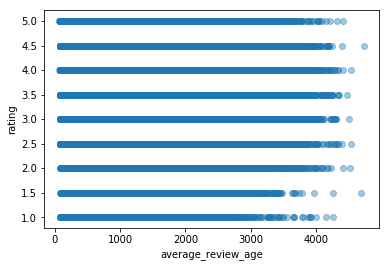

In [14]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'], df['stars'], alpha=0.4)
plt.xlabel("average_review_age")
plt.ylabel("rating")

## Part 5: MLR function

In [17]:
def MLR_function (features): 
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,features]
    
    # split x into 80% training set and 20% testing set
    x_train, x_test, y_train, y_test = train_test_split(features, ratings, train_size=0.8, test_size=0.2, random_state=1)
    
    if len(x_train.shape) < 2:
        x_train = np.array(x_train).reshape(-1,1)
        x_test = np.array(x_test).reshape(-1,1)
    
    # Create a Multiple Linear Regression model
    mlr = LinearRegression() 
    mlr.fit(x_train, y_train)
    
    # predict y-values from x_test
    y_predict = mlr.predict(x_test)
    # Create a scatter plot to compare the known output compared to the predicted output 
    plt.scatter(y_test, y_predict, alpha=0.4)
    # Create x-axis label and y-axis label
    plt.xlabel("Actual ratings")
    plt.ylabel("Predicted ratings")
    # Create a title
    plt.title("Rating prediction")
    # Show the plot
    plt.show()

    # Residual Plot
    residuals = y_predict - y_test
    plt.scatter(y_predict, residuals, alpha=0.4)
    plt.title('Residual Analysis')
    plt.show()

    # Sklearn‘s linear_model.LinearRegression comes with a .score() method that returns R²
    print("Train score: " + str(mlr.score(x_train, y_train)))
    print("Test score: "+ str(mlr.score(x_test, y_test)))
    # print the coefficients
    print("coefficients:") 
    print(mlr.coef_)
    

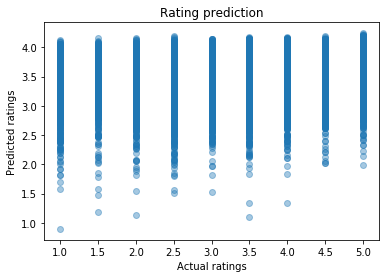

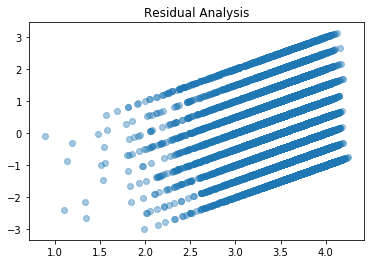

Train score: 0.08250309566544889
Test score: 0.08083081210060561
coefficients:
[-0.00099772 -0.00011622]


In [18]:
# create our first model with `average_review_length` and `average_review_age` as features
features = ['average_review_length','average_review_age']
MLR_function (features)

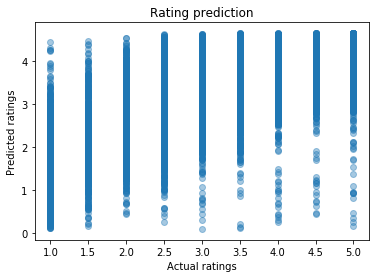

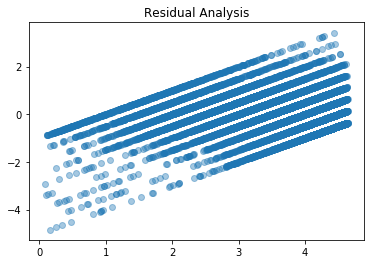

Train score: 0.6118980950438655
Test score: 0.6114021046919492
coefficients:
[2.30339084]


In [19]:
# create a model with average review sentiment
features = ['average_review_sentiment']
MLR_function (features)

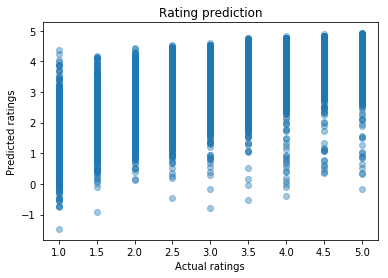

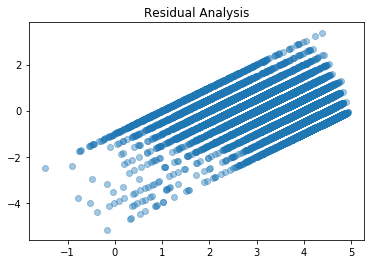

Train score: 0.6520510292564032
Test score: 0.6495675480094902
coefficients:
[ 2.24303031e+00 -5.97830018e-04 -1.52099368e-04]


In [21]:
# create our first model with `average_review_length`, 'average review sentiment' and `average_review_age` as features
feature_subset = features = ['average_review_sentiment','average_review_length','average_review_age']
MLR_function (features)


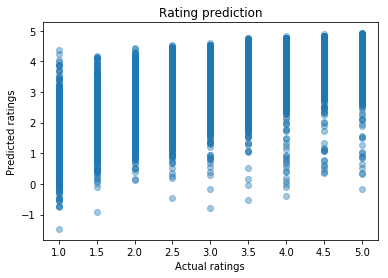

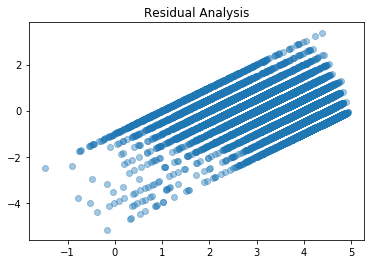

Train score: 0.6520510292564032
Test score: 0.6495675480094902
coefficients:
[ 2.24303031e+00 -5.97830018e-04 -1.52099368e-04]


In [22]:
# create a model with all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']
MLR_function (features)

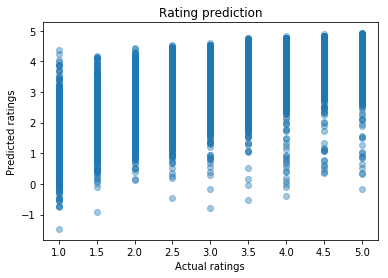

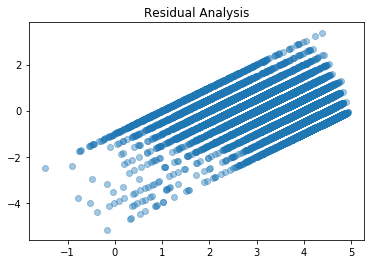

Train score: 0.6520510292564032
Test score: 0.6495675480094902
coefficients:
[ 2.24303031e+00 -5.97830018e-04 -1.52099368e-04]


In [23]:
# create a model with all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']
MLR_function (features)

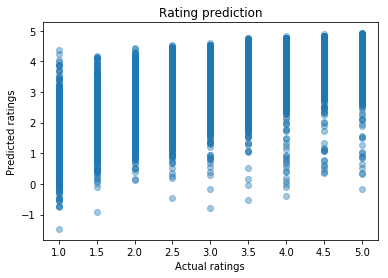

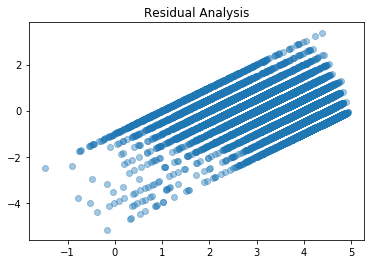

Train score: 0.6520510292564032
Test score: 0.6495675480094902
coefficients:
[ 2.24303031e+00 -5.97830018e-04 -1.52099368e-04]


In [24]:
# create a model with all features
all_features = binary_features + numeric_features
MLR_function (features)

## Danielle's Delicious Delicacies' Debut

You've loaded the data, cleaned it, modeled it, and evaluated it. You're tired, but glowing with pride after all the hard work. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

Our best model was the model using all features, so we'll work with this model again. In the cell below print `all_features` to get a reminder of what features we are working with.

Run the cell below to grab all the features and retrain our model on them.

In [ ]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

To give you some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [ ]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [ ]:
danielles_delicious_delicacies = np.array([_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]).reshape(1,-1)

In [ ]:
model.predict(danielles_delicious_delicacies)

## Next Steps

You have successfully built a linear regression model that predicts a restaurant's Yelp rating! As you have seen, it can be pretty hard to predict a rating like this even when we have a plethora of data. What other questions come to your mind when you see the data we have? What insights do you think could come from a different kind of analysis? Here are some ideas to ponder:

* Can we predict the cuisine of a restaurant based on the users that review it?
* What restaurants are similar to each other in ways besides cuisine?
* Are there different restaurant vibes, and what kind of restaurants fit these conceptions?
* How does social media status affect a restaurant's credibility and visibility?

As you progress further into the field of data science, you will be able to create models that address these questions and many more! But in the meantime, get back to working on that burgeoning restaurant business plan.